In [63]:
from matplotlib import pyplot as plt, image as mpimg 
import cv2
import numpy as np 
import pandas as pd 
import os
import random

In [116]:
# TODO : read 1 by 1 each images and apply them different combination of filter 
path = os.getcwd()+"\\training set\\"
registerPath = os.getcwd()+"\\test"
for root, dirs, files in os.walk(path):
    count=0
    for file in files:
        full_path = os.path.join(root, file)
        img = mpimg.imread(full_path) # color between 0 -> noir and 255 -> white
        line, col, rgb = img.shape # 200 rows, 200 columns, RGB 
        img = reverseColor(img)
        img = removeWhite(img)
        img = smoothImage(img)
        img = noise(img)
        img = rota(img)
        img = sliceImg(img)
        img = erosion(img)
        img = emaciated(img)
        # os.makedirs(root+"\\new", exist_ok=True)
        # cv2.imwrite(root+"\\new\\"+str(count)+".jpg", img)
        count+=1

In [115]:
def reverseColor(img) :
    modification = np.zeros_like(img) # matrix with the same size of img but full of 0
    modification = 255 - img 
    return modification
def removeWhite(img) : 
    return np.clip(img.astype(int),0,150).astype(np.uint8)
def smoothImage(img) : 
    ksize=(random.choice(range(1, 20, 2)),random.choice(range(1, 20, 2))) # between 1 and 20 odd for kernel's length for convolution 
    # more the values are high more the blur will be impacted by a larger number of pixel 
    # odd kernel guarantees that the core has a symmetrical central point
    standardDev = random.randint(0,20) # impact on the pronunciation of blur on the final matrix during convolution 
    return cv2.GaussianBlur(img,ksize,standardDev)
def noise(img) : 
    mean = random.uniform(0, 0.3) # the average of the noise that will be added 
    standardDev = random.uniform(0, 0.3)
    image = img.astype(np.float32) / 255.0 # normalisation 
    noise = np.random.normal(mean, std_dev, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 1) # just to be sure that the value stay between 0 and 1 
    return (noisy_image * 255).astype(np.uint8) # convert to 8-bit integers
def rota(img) :
    return np.rot90(img,random.randint(0,359))
def sliceImg(img) : # binarization of the image to slice the shape of our figure
    _,binary_image = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY) # return a tuple : (threshold value actually used in thresholding process, image)
    # this function return us an image with hole on our figure -> to counter that, we can apply an erosion filter
    return binary_image
def erosion(img) : 
    kernel = np.ones((random.randint(0,5),random.randint(0,5)), np.uint8)
    return cv2.erode(img,kernel,iterations=1) # Currently we will let iterations=1, we will see later if we change or not 
def emaciated(img) : 
    kernel = np.ones((random.randint(0,5),random.randint(0,5)), np.uint8)
    return cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)

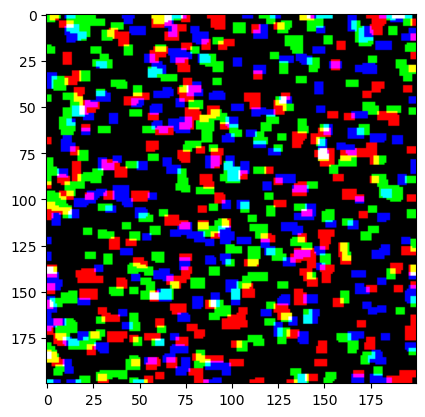

In [114]:
opened_image = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(opened_image)

In [14]:
# Now we will linger on the distortion aspect of an image 
# To apply distortion we need to select point but not randomly ... 
# I will explore  different algorithm that will be usefull
# the canny algoritghm 
# the Hough's transformation 
# corner sensor of Harris or Shi-Tomasi

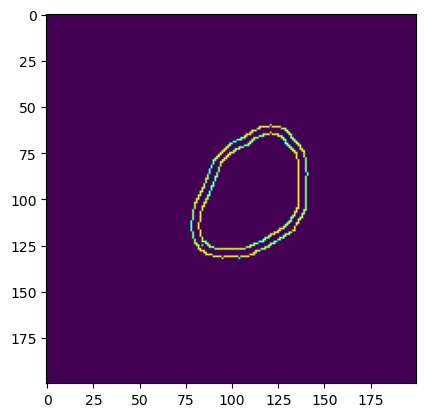

In [15]:
# Détection des contours 
i = cv2.Canny(smoothed_image, 1, 10)
plt.imshow(i)
#essayer de comprendre algorithme de Sobel qui permet de calculer le gradient utile aux paramètres que l'on passe pour la fonction canny

In [25]:
# Liste de points de contours obtenu avec l'algorithme de Canny
contours, _ = cv2.findContours(i, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours

(array([[[121,  60]],
 
        [[120,  61]],
 
        [[115,  61]],
 
        [[113,  63]],
 
        [[111,  63]],
 
        [[109,  65]],
 
        [[108,  65]],
 
        [[106,  67]],
 
        [[105,  67]],
 
        [[104,  68]],
 
        [[103,  68]],
 
        [[102,  69]],
 
        [[101,  69]],
 
        [[100,  70]],
 
        [[ 99,  70]],
 
        [[ 90,  79]],
 
        [[ 90,  81]],
 
        [[ 89,  82]],
 
        [[ 89,  83]],
 
        [[ 88,  84]],
 
        [[ 88,  86]],
 
        [[ 87,  87]],
 
        [[ 87,  88]],
 
        [[ 86,  89]],
 
        [[ 86,  91]],
 
        [[ 85,  92]],
 
        [[ 85,  93]],
 
        [[ 84,  94]],
 
        [[ 84,  95]],
 
        [[ 83,  96]],
 
        [[ 83,  97]],
 
        [[ 82,  98]],
 
        [[ 82,  99]],
 
        [[ 81, 100]],
 
        [[ 81, 101]],
 
        [[ 80, 102]],
 
        [[ 80, 105]],
 
        [[ 79, 106]],
 
        [[ 79, 111]],
 
        [[ 78, 112]],
 
        [[ 78, 117]],
 
        [[ 79, 1

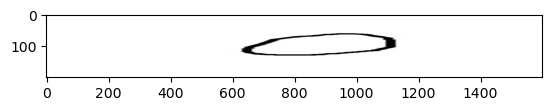

In [38]:
# opération de redimensionnement 
# On pourra jouer avec l'aspect un peu tassé pour crop et ensuite remettre sur image taille 200x200
new_width = 1600  # Nouvelle largeur
new_height = 200  # Nouvelle hauteur

# Redimensionnement de l'image
resized_img = cv2.resize(img, (new_width, new_height))
plt.imshow(resized_img)

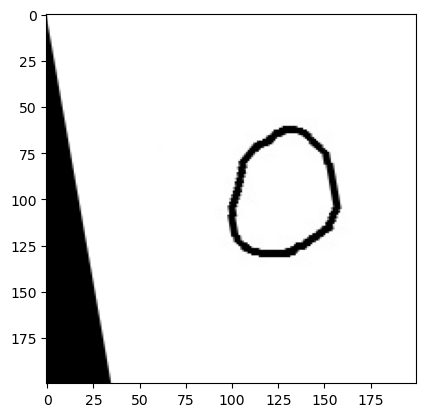

In [31]:
# opération de cisaillementshear_angle = 30  # Angle de cisaillement en degrés

shear_angle = 10  # Angle de cisaillement en degrés

# Matrice de transformation affine pour le cisaillement
matrix_shear = np.float32([[1, np.tan(np.radians(shear_angle)), 0],
                           [0, 1, 0]])

# Application de la transformation affine de cisaillement
sheared_img = cv2.warpAffine(img, matrix_shear, (img.shape[0], img.shape[1]))
plt.imshow(sheared_img)

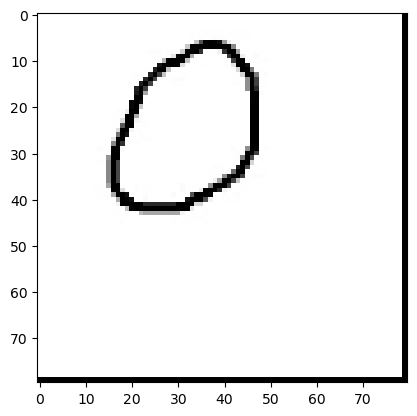

In [48]:
# Créer une grille de déformation
rows, cols = image.shape[:2]
grid_size = 80
x_points = np.linspace(50, cols, grid_size)
y_points = np.linspace(50, rows, grid_size)
x_grid, y_grid = np.meshgrid(x_points, y_points)

# Définir les points de contrôle de la grille de déformation
control_points = np.column_stack((x_grid.flatten(), y_grid.flatten()))

# Appliquer la déformation de la grille
deformed_image = cv2.remap(img, x_grid.astype(np.float32), y_grid.astype(np.float32), interpolation=cv2.INTER_LINEAR)

plt.imshow(deformed_image)